# NAIVE BAYES

In [1]:
import pandas as pd

## I. Chuẩn bị dữ liệu

In [2]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Dữ liệu liên tục
continous_data = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'EmployeeCount',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'StandardHours',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Dữ liệu phân loại
classified_data = [
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'Over18',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

In [5]:
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

In [6]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')

Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 33


In [7]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [8]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

## II. One Hot Encoding và Label Encoding

In [9]:
X_origin = X.copy()
y_origin = y.copy()

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# define model encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
label_encoder = LabelEncoder()

In [11]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [12]:
X_encode

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,94,5993,19479,8,11,80,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,49,279,8,1,61,5130,24907,1,23,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,1,92,2090,2396,6,15,80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,1392,3,1,56,2909,23159,1,11,80,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,40,3468,16632,9,12,80,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,41,2571,12290,4,17,80,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,42,9991,21457,4,15,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,1,87,6142,5174,1,20,80,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,1,63,5390,13243,2,14,80,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
y_encode = label_encoder.fit_transform(y_origin)

In [14]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

## III. Tự định nghĩa Class, Function

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ===================================
# GAUSSIAN NAIVE BAYES - Tự implement
# ===================================
class My_GaussianNB:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]

        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / n_samples
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9

    def _gaussian_pdf(self, x, mean, var):
        return np.exp(-((x - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)

    def predict_log_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))

        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[c])
            pdf = self._gaussian_pdf(X, self.mean[c], self.var[c])
            log_likelihood = np.sum(np.log(pdf + 1e-9), axis=1)
            log_probs[:, idx] = log_prior + log_likelihood

        return log_probs

    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probs, axis=1)]

# BERNOULLI NAIVE BAYES - Tự implement
# ===================================
class My_BernoulliNB:
    """
    Bernoulli Naive Bayes classifier cho dữ liệu binary.
    Phù hợp cho text classification với binary features (từ có/không).
    
    Parameters:
    -----------
    alpha : float, default=1.0
        Smoothing parameter (Laplace smoothing)
    binarize : float or None, default=0.0
        Ngưỡng để chuyển features thành binary (0/1)
        Nếu None, giả sử dữ liệu đã là binary
    """
    def __init__(self, alpha=1.0, binarize=0.0):
        self.alpha = alpha
        self.binarize = binarize
        self.classes = None
        self.feature_prob = {}  # P(feature=1|class)
        self.priors = {}
    
    def _binarize(self, X):
        """Chuyển đổi dữ liệu thành binary nếu cần."""
        if self.binarize is not None:
            return (X > self.binarize).astype(int)
        return X
    
    def fit(self, X, y):
        """
        Huấn luyện Bernoulli Naive Bayes.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target labels
        """
        X = self._binarize(X)
        self.classes = np.unique(y)
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        for c in self.classes:
            X_c = X[y == c]
            n_c = len(X_c)
            
            # Prior probability P(class)
            self.priors[c] = n_c / n_samples
            
            # Feature probability P(feature=1|class) với Laplace smoothing
            # Smoothing: (count + alpha) / (total + 2*alpha)
            # 2*alpha vì Bernoulli có 2 giá trị (0 và 1)
            feature_count = np.sum(X_c, axis=0)
            self.feature_prob[c] = (feature_count + self.alpha) / (n_c + 2 * self.alpha)
        
        return self
    
    def predict_log_proba(self, X):
        """
        Tính log probability cho mỗi class.
        
        Returns:
        --------
        log_probs : array of shape (n_samples, n_classes)
        """
        X = self._binarize(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))
        
        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[c])
            
            # Log likelihood cho Bernoulli:
            # log P(X|c) = Σ[x_i * log(p_i) + (1-x_i) * log(1-p_i)]
            p = self.feature_prob[c]
            log_p = np.log(p)
            log_1_p = np.log(1 - p)
            
            # Vectorized calculation
            log_likelihood = X @ log_p + (1 - X) @ log_1_p
            log_probs[:, idx] = log_prior + log_likelihood
        
        return log_probs
    
    def predict_proba(self, X):
        """
        Tính probability cho mỗi class.
        
        Returns:
        --------
        probs : array of shape (n_samples, n_classes)
        """
        log_probs = self.predict_log_proba(X)
        
        # Normalize bằng log-sum-exp trick để tránh overflow
        log_probs_max = np.max(log_probs, axis=1, keepdims=True)
        exp_probs = np.exp(log_probs - log_probs_max)
        probs = exp_probs / np.sum(exp_probs, axis=1, keepdims=True)
        
        return probs
    
    def predict(self, X):
        """
        Dự đoán class cho X.
        
        Returns:
        --------
        y_pred : array of shape (n_samples,)
        """
        log_probs = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probs, axis=1)]


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_hybrid(gnb, bnb, 
                           X_train, y_train, 
                           X_test, y_test, 
                           description="Hybrid Gaussian–Bernoulli"):
    print("="*60)
    print(f"ĐANG HUẤN LUYỆN: {description}")

    scaler = StandardScaler()
    X_train_num = X_train[continous_data].to_numpy()
    X_train_num = scaler.fit_transform(X_train_num)
    X_train_cat = X_train.drop(continous_data, axis=1).to_numpy()

    X_test_num = X_test[continous_data].to_numpy()
    X_test_num = scaler.transform(X_test_num)
    X_test_cat = X_test.drop(continous_data, axis=1).to_numpy()


    try:
        # 1. Fit mô hình
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 2. Predict log xác suất của từng model
        log_proba_gnb = gnb.predict_log_proba(X_test_num)
        log_proba_bnb = bnb.predict_log_proba(X_test_cat)

        # 3. Cộng log xác suất (hybrid)
        combined_log = log_proba_gnb + log_proba_bnb

        # 4. Lấy class dự đoán
        y_pred = gnb.classes[np.argmax(combined_log, axis=1)]

        # 5. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


## IV. Xây dựng mô hình

### 1. Thực hiện với dữ liệu gốc

In [17]:
from sklearn.model_selection import train_test_split

X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

In [18]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode, y_encode, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode, y_encode, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode, y_encode, test_size=0.4, random_state=42
)

#### 1.1. NAIVEBAYES (Numpy thuần)

In [19]:
my_gnb = My_GaussianNB()
my_bnb = My_BernoulliNB()

In [20]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t1, y_train_origin_t1, 
                           X_test_origin_t1, y_test_origin_t1,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294


 Confusion Matrix:
 [[242  13]
 [ 25  14]]



In [21]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t2, y_train_origin_t2, 
                           X_test_origin_t2, y_test_origin_t2,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8481

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       380
           1       0.45      0.46      0.46        61

    accuracy                           0.85       441
   macro avg       0.68      0.68      0.68       441
weighted avg       0.85      0.85      0.85       441


 Confusion Matrix:
 [[346  34]
 [ 33  28]]



In [22]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t3, y_train_origin_t3, 
                           X_test_origin_t3, y_test_origin_t3,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       507
           1       0.54      0.44      0.49        81

    accuracy                           0.87       588
   macro avg       0.73      0.69      0.71       588
weighted avg       0.86      0.87      0.87       588


 Confusion Matrix:
 [[476  31]
 [ 45  36]]



#### 1.2. NAIVEBAYES (Thư viện)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_hybrid_tv(gnb, bnb, 
                            X_train, y_train, 
                            X_test, y_test, 
                            description="Hybrid Gaussian–Bernoulli"):
    print("="*60)
    print(f" ĐANG HUẤN LUYỆN: {description}")

    scaler = StandardScaler()
    # 1. Tách numeric và categorical
    X_train_num = X_train[continous_data]
    X_train_num = scaler.fit_transform(X_train_num)
    X_train_cat = X_train.drop(continous_data, axis=1)

    X_test_num  = X_test[continous_data]
    X_test_num = scaler.transform(X_test_num)
    X_test_cat  = X_test.drop(continous_data, axis=1)

    try:
        # 2. Fit 2 model sklearn
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 3. Predict log xác suất
        log_gnb = gnb.predict_log_proba(X_test_num)
        log_bnb = bnb.predict_log_proba(X_test_cat)

        # 4. Cộng log xác suất (hybrid)
        combined_log = log_gnb + log_bnb

        # 5. Lấy class dự đoán
        y_pred = gnb.classes_[np.argmax(combined_log, axis=1)]

        # 6. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [24]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

lib_gnb = GaussianNB()
lib_bnb = BernoulliNB()

In [25]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t1, y_train_origin_t1, 
                           X_test_origin_t1, y_test_origin_t1,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294


 Confusion Matrix:
 [[242  13]
 [ 25  14]]



In [26]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t2, y_train_origin_t2, 
                           X_test_origin_t2, y_test_origin_t2,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8481

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       380
           1       0.45      0.46      0.46        61

    accuracy                           0.85       441
   macro avg       0.68      0.68      0.68       441
weighted avg       0.85      0.85      0.85       441


 Confusion Matrix:
 [[346  34]
 [ 33  28]]



In [27]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t3, y_train_origin_t3, 
                           X_test_origin_t3, y_test_origin_t3,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       507
           1       0.54      0.44      0.49        81

    accuracy                           0.87       588
   macro avg       0.73      0.69      0.71       588
weighted avg       0.86      0.87      0.87       588


 Confusion Matrix:
 [[476  31]
 [ 45  36]]



#### 1.3. Nhận xét

- Kết quả của mô hình NAIVEBAYES bằng Numpy và mô hình NAIVEBAYES của thư viện (Scikit-learn) là giống hệt nhau ở cả 3 tỷ lệ chia.

     - Split 4/1: Cả hai đều có Accuracy 0.8707, ma trận nhầm lẫn [[242  13], [25  14]].

     - Split 7/3: Cả hai đều có Accuracy 0.8481, ma trận nhầm lẫn [[346  34], [33  28]].

     - Split 6/4: Cả hai đều có Accuracy 0.8707, ma trận nhầm lẫn [[476  31], [45  36]].

- Cả 3 tỷ lệ chia (4/1, 7/3, 6/4) đều cho thấy mô hình đang có 1 vài vấn đề:

    - Chỉ số Accuracy (84-87%) rất cao nhưng với dữ liệu mất cân bằng, Accuracy không phải thước đo chính.

    - Lớp 0 (đa số) hoạt động rất ổn: precision 0.91, recall 0.91 - 0.95, F1 91% - 93%, mô hình nhận diện lớp 0 đáng tin cậy.

    - Lớp 1 (thiểu số) còn hạn chế: precision 0.45 - 0.54, recall 0.36 - 0.46, F1 42% - 49% → mô hình bỏ sót nhiều mẫu lớp 1 và dễ nhầm lẫn khi dự đoán lớp này.

Đây không phải là hiện tượng overfit. Nguyên nhân chính khiến mô hình hoạt động chưa tốt nằm ở sự mất cân bằng nghiêm trọng trong dữ liệu, khi khoảng 84% mẫu thuộc lớp 0. Điều này khiến mô hình bị thiên lệch mạnh về lớp chiếm đa số.
Với Naive Bayes, việc dự đoán dựa trên xác suất tiên nghiệm (prior probability) của từng lớp, nên khi lớp 1 có xác suất gốc nhỏ, mô hình khó học và nhận diện chính xác lớp này. Hệ quả là precision và recall của lớp 1 đều thấp, phản ánh việc mô hình chưa thể nhận dạng tốt các mẫu thuộc lớp thiểu số.

### 2. Thực hiện với dữ liệu đã giảm chiều

#### 2.1. Giảm chiều sử dụng PCA

In [28]:
# Lấy data
X_pca = X_encode.copy()
y_pca = y_encode.copy()

In [29]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_pca, X_test_t1_pca, y_train_t1_pca, y_test_t1_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_t2_pca, X_test_t2_pca, y_train_t2_pca, y_test_t2_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
X_train_t3_pca, X_test_t3_pca, y_train_t3_pca, y_test_t3_pca = train_test_split(X_pca, y_pca, test_size=0.4, random_state=42)

In [30]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t1_pca_std = scaler.fit_transform(X_train_t1_pca)
X_test_t1_pca_std = scaler.transform(X_test_t1_pca)

X_train_t2_pca_std = scaler.fit_transform(X_train_t2_pca)
X_test_t2_pca_std = scaler.transform(X_test_t2_pca)

X_train_t3_pca_std = scaler.fit_transform(X_train_t3_pca)
X_test_t3_pca_std = scaler.transform(X_test_t3_pca)

In [31]:
# Giảm chiều
from sklearn.decomposition import PCA

pca_n6 = PCA(n_components=6)

X_train_t1_after_pca_n6_std = pca_n6.fit_transform(X_train_t1_pca_std)
X_test_t1_after_pca_n6_std = pca_n6.transform(X_test_t1_pca_std)

X_train_t2_after_pca_n6_std = pca_n6.fit_transform(X_train_t2_pca_std)
X_test_t2_after_pca_n6_std = pca_n6.transform(X_test_t2_pca_std)

X_train_t3_after_pca_n6_std = pca_n6.fit_transform(X_train_t3_pca_std)
X_test_t3_after_pca_n6_std = pca_n6.transform(X_test_t3_pca_std)

##### 2.1.1. NAIVEBAYES (Numpy thuần)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_gnb(gnb,
                           X_train, y_train, 
                           X_test, y_test, 
                           description="Gaussian"):
    print("="*60)
    print(f"ĐANG HUẤN LUYỆN: {description}")

    try:
        # 1. Fit mô hình
        gnb.fit(X_train, y_train)

        # 2. Predict log xác suất 
        # log_proba_gnb = gnb.predict_log_proba(X_test)

        # 2. Lấy class dự đoán
        y_pred = gnb.predict(X_test)

        # 3. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [33]:
my_gnb = My_GaussianNB()

In [34]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t1_after_pca_n6_std, y_train_t1_pca, 
                           X_test_t1_after_pca_n6_std, y_test_t1_pca,
                           "Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294


 Confusion Matrix:
 [[253   2]
 [ 36   3]]



In [35]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t2_after_pca_n6_std, y_train_t2_pca, 
                           X_test_t2_after_pca_n6_std, y_test_t2_pca,
                           "Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8549

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.41      0.11      0.18        61

    accuracy                           0.85       441
   macro avg       0.64      0.54      0.55       441
weighted avg       0.81      0.85      0.82       441


 Confusion Matrix:
 [[370  10]
 [ 54   7]]



In [36]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t3_after_pca_n6_std, y_train_t3_pca, 
                           X_test_t3_after_pca_n6_std, y_test_t3_pca,
                           "Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8520

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       507
           1       0.38      0.12      0.19        81

    accuracy                           0.85       588
   macro avg       0.63      0.55      0.55       588
weighted avg       0.81      0.85      0.82       588


 Confusion Matrix:
 [[491  16]
 [ 71  10]]



##### 2.1.2. NAIVEBAYES (Thư viện)

In [37]:
lib_gnb = GaussianNB()

In [38]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t1_after_pca_n6_std, y_train_t1_pca, 
                           X_test_t1_after_pca_n6_std, y_test_t1_pca,
                           "Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294


 Confusion Matrix:
 [[253   2]
 [ 36   3]]



In [39]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t2_after_pca_n6_std, y_train_t2_pca, 
                           X_test_t2_after_pca_n6_std, y_test_t2_pca,
                           "Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8549

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.41      0.11      0.18        61

    accuracy                           0.85       441
   macro avg       0.64      0.54      0.55       441
weighted avg       0.81      0.85      0.82       441


 Confusion Matrix:
 [[370  10]
 [ 54   7]]



In [40]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t3_after_pca_n6_std, y_train_t3_pca, 
                           X_test_t3_after_pca_n6_std, y_test_t3_pca,
                           "Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - PCA n=6 đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8520

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       507
           1       0.38      0.12      0.19        81

    accuracy                           0.85       588
   macro avg       0.63      0.55      0.55       588
weighted avg       0.81      0.85      0.82       588


 Confusion Matrix:
 [[491  16]
 [ 71  10]]



#### 2.2. Giảm chiều sử dụng LDA

In [41]:
# Lấy data
X_lda = X_encode.copy()
y_lda = y_encode.copy()

In [42]:
# Chia train/test
from sklearn.model_selection import train_test_split

X_train_t1_lda, X_test_t1_lda, y_train_t1_lda, y_test_t1_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)
X_train_t2_lda, X_test_t2_lda, y_train_t2_lda, y_test_t2_lda = train_test_split(X_lda, y_lda, test_size=0.3, random_state=42)
X_train_t3_lda, X_test_t3_lda, y_train_t3_lda, y_test_t3_lda = train_test_split(X_lda, y_lda, test_size=0.4, random_state=42)

In [43]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t1_lda_std = scaler.fit_transform(X_train_t1_lda)
X_test_t1_lda_std = scaler.transform(X_test_t1_lda)

X_train_t2_lda_std = scaler.fit_transform(X_train_t2_lda)
X_test_t2_lda_std = scaler.transform(X_test_t2_lda)

X_train_t3_lda_std = scaler.fit_transform(X_train_t3_lda)
X_test_t3_lda_std = scaler.transform(X_test_t3_lda)

In [44]:
# Giảm chiều
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_classes = y_origin.value_counts()
number_classes = len(num_classes)

lda = LinearDiscriminantAnalysis(n_components = number_classes - 1)

X_train_t1_after_lda_std = lda.fit_transform(X_train_t1_lda_std, y_train_t1_lda)
X_test_t1_after_lda_std = lda.transform(X_test_t1_lda_std)

X_train_t2_after_lda_std = lda.fit_transform(X_train_t2_lda_std, y_train_t2_lda)
X_test_t2_after_lda_std = lda.transform(X_test_t2_lda_std)

X_train_t3_after_lda_std = lda.fit_transform(X_train_t3_lda_std, y_train_t3_lda)
X_test_t3_after_lda_std = lda.transform(X_test_t3_lda_std)

##### 2.2.1. NAIVEBAYES (Numpy thuần)

In [45]:
my_gnb = My_GaussianNB()

In [46]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t1_after_lda_std, y_train_t1_lda, 
                           X_test_t1_after_lda_std, y_test_t1_lda,
                           "Naive gnb (Numpy thuần) - LDA đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - LDA đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.52      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294


 Confusion Matrix:
 [[239  16]
 [ 22  17]]



In [47]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t2_after_lda_std, y_train_t2_lda, 
                           X_test_t2_after_lda_std, y_test_t2_lda,
                           "Naive gnb (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - LDA đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8821

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.60      0.44      0.51        61

    accuracy                           0.88       441
   macro avg       0.76      0.70      0.72       441
weighted avg       0.87      0.88      0.87       441


 Confusion Matrix:
 [[362  18]
 [ 34  27]]



In [48]:
fit_and_evaluate_gnb(my_gnb,
                           X_train_t3_after_lda_std, y_train_t3_lda, 
                           X_test_t3_after_lda_std, y_test_t3_lda,
                           "Naive gnb (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Numpy thuần) - LDA đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8639

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       507
           1       0.51      0.41      0.45        81

    accuracy                           0.86       588
   macro avg       0.71      0.67      0.69       588
weighted avg       0.85      0.86      0.86       588


 Confusion Matrix:
 [[475  32]
 [ 48  33]]



##### 2.2.2. NAIVEBAYES (Thư viện)

In [49]:
lib_gnb = GaussianNB()

In [50]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t1_after_lda_std, y_train_t1_lda, 
                           X_test_t1_after_lda_std, y_test_t1_lda,
                           "Naive gnb (Thư viện) - LDA đã chuẩn hóa (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - LDA đã chuẩn hóa (train/test: 4/1)

 Accuracy: 0.8707

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       255
           1       0.52      0.44      0.47        39

    accuracy                           0.87       294
   macro avg       0.72      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294


 Confusion Matrix:
 [[239  16]
 [ 22  17]]



In [51]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t2_after_lda_std, y_train_t2_lda, 
                           X_test_t2_after_lda_std, y_test_t2_lda,
                           "Naive gnb (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - LDA đã chuẩn hóa (train/test: 7/3)

 Accuracy: 0.8821

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.60      0.44      0.51        61

    accuracy                           0.88       441
   macro avg       0.76      0.70      0.72       441
weighted avg       0.87      0.88      0.87       441


 Confusion Matrix:
 [[362  18]
 [ 34  27]]



In [52]:
fit_and_evaluate_gnb(lib_gnb,
                           X_train_t3_after_lda_std, y_train_t3_lda, 
                           X_test_t3_after_lda_std, y_test_t3_lda,
                           "Naive gnb (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb (Thư viện) - LDA đã chuẩn hóa (train/test: 6/4)

 Accuracy: 0.8639

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       507
           1       0.51      0.41      0.45        81

    accuracy                           0.86       588
   macro avg       0.71      0.67      0.69       588
weighted avg       0.85      0.86      0.86       588


 Confusion Matrix:
 [[475  32]
 [ 48  33]]



#### 2.3. Nhận xét

Cả 3 trường hợp đều sử dụng thuật toán Naive Bayes và đối mặt với vấn đề mất cân bằng dữ liệu (imbalanced data), khi số lượng mẫu của lớp 0 (support rất cao, khoảng 255-507) lớn hơn rất nhiều so với lớp 1 (support rất thấp, khoảng 39-81). Điều này dẫn đến một số đặc điểm chung:

- Accuracy cao: Độ chính xác (Accuracy) luôn cao (khoảng 0.84 - 0.88) do mô hình học cách dự đoán tốt lớp chiếm đa số (lớp 0).

- Hiệu suất lớp 0 tốt: Các chỉ số Precision, Recall, F1-score của lớp 0 luôn rất cao (trên 0.90) và ổn định.

- Hiệu suất lớp 1 kém: Các chỉ số của lớp 1 (lớp thiểu số) luôn rất thấp, đặc biệt là Recall và F1-score, cho thấy mô hình gặp khó khăn trong việc xác định các mẫu thuộc lớp này.

- Sự sai lệch của Accuracy: Chỉ số Accuracy không phản ánh đúng khả năng phân loại tổng thể, đặc biệt là với lớp thiểu số. Các chỉ số như macro avg F1-score (khoảng 0.53 - 0.72) hoặc weighted avg F1-score (tốt hơn, khoảng 0.82 - 0.87) sẽ là thước đo tốt hơn.

📊 So sánh Kết Quả Phân Tích Mô Hình

| Phương pháp | Lớp 1 F1-score tốt nhất | Macro Avg F1-score tốt nhất | Kết luận |
| :--- | :--- | :--- | :--- |
| **Dữ liệu Gốc** | **0.49** (Tỷ lệ 6/4) | **0.68** (Tỷ lệ 4/1 & 7/3) | Hiệu suất nền tảng, chấp nhận được. |
| **PCA** | **0.19** (Tỷ lệ 6/4) | **0.55** (Tỷ lệ 7/3 & 6/4) | **Kém nhất**, làm giảm đáng kể khả năng phân loại lớp 1 (lớp thiểu số). |
| **LDA** | **0.51** (Tỷ lệ 7/3) | **0.72** (Tỷ lệ 7/3) | **Tốt nhất**, cải thiện khả năng phân loại lớp thiểu số so với Dữ liệu Gốc. |

Kết luận về Overfit: Đây không phải là Overfitting.

Cả 3 phương pháp (Dữ liệu gốc, PCA, LDA) đều cho thấy cùng một vấn đề: là thiên vị (Bias) và Underfitting đối với Lớp Thiểu số (Lớp 1) do Dữ liệu Mất cân bằng.

Biện pháp Hiệu chỉnh Phù hợp

Áp dụng LDA:
- Chia X_train_full, X_test_full, y_train_full, y_test_full.
- fit LDA trên X_train_full, y_train_full.
- transform X_train_full, X_test_full để tạo ra X_train_lda, X_test_lda.

LDA + SMOTE (NB trên Dữ liệu Cân bằng):
- Áp dụng SMOTE chỉ trên tập huấn luyện LDA (X_train_lda) và nhãn gốc (y_train_full) => X_train_smote, y_train_smote.
- Kiểm tra: Xác minh rằng số lượng mẫu của Lớp 0 và Lớp 1 trong y_train_smote đã cân bằng.
- Huấn luyện NB (Không Trọng số): Huấn luyện mô hình Naive Bayes không sử dụng tham số trọng số lớp, với X_train_smote, y_train_smote.
- Đánh giá trên (X_test_lda, y_test_full).

## V. Trực quan

In [53]:
from matplotlib import pyplot as plt


def helper_and_plot(X_train, X_test, y_train, y_test, model = None, command = 'Default command', reduce_name = None, n_components = 2):
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import time
    if reduce_name == 'PCA':
        model_rd = PCA(n_components=n_components)
        X_train = model_rd.fit_transform(X_train)
        X_test = model_rd.transform(X_test)
    elif reduce_name == 'LDA':
        model_rd = LinearDiscriminantAnalysis(n_components=n_components)
        X_train = model_rd.fit_transform(X_train, y_train)
        X_test = model_rd.transform(X_test)


    start_time = time.time()
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    end_time = time.time()
    y_prediction_train = model.predict(X_train)


    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()

        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))

        # Điểm đúng và sai
        correct = (y_pred == y_test)

        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')

        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # def plot_confusion_heatmap(y_pred, y_test, title="Ma trận nhầm lẫn"):
    #     cm = confusion_matrix(y_test, y_pred)
    #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    #     plt.title(title)
    #     plt.xlabel("Dự đoán")
    #     plt.ylabel("Thực tế")
    #     plt.show()


    print()
    print('=' * 20, command, '=' * 20)
    print(f'X_train: {X_train.shape} X_test: {X_test.shape}')
    print(f'Total time: {end_time - start_time}')
    print(f'Accuracy of model {model.__class__.__name__}: {accuracy_score(y_prediction, y_test)}')
    print(f'Accuracy train of model {model.__class__.__name__}: {accuracy_score(y_prediction_train, y_train)}')
    print(f'Confuse matrix: \n{confusion_matrix(y_test, y_prediction)}')
    print('=' * 20, command, '=' * 20)
    print()

    plot_prediction_vs_true(y_prediction, y_test)

In [54]:
X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()


--- BẮT ĐẦU LUỒNG 1: PCA (n=6) với Gaussian Naive Bayes ---
Đã giảm chiều xuống 6 cột bằng PCA.
Đang huấn luyện Gaussian Naive Bayes trên dữ liệu PCA...

==================== Gaussian Naive Bayes với dữ liệu PCA (n=6) ====================
X_train: (882, 6) X_test: (588, 6)
Total time: 0.0014586448669433594
Accuracy of model GaussianNB: 0.8520408163265306
Accuracy train of model GaussianNB: 0.826530612244898
Confuse matrix: 
[[491  16]
 [ 71  10]]
==================== Gaussian Naive Bayes với dữ liệu PCA (n=6) ====================



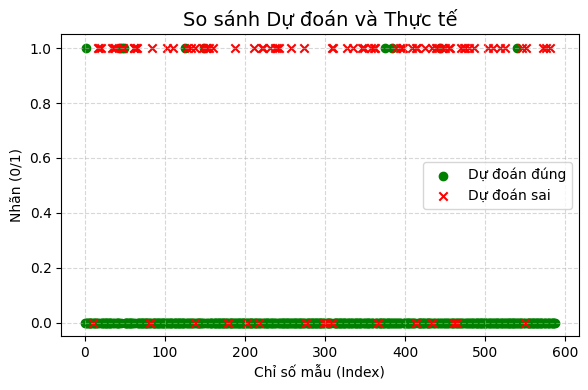


--- BẮT ĐẦU LUỒNG 2: LDA (n=1) với Gaussian Naive Bayes ---
Đã giảm chiều xuống 1 cột bằng LDA.
Đang huấn luyện Gaussian Naive Bayes trên dữ liệu LDA...

==================== Gaussian Naive Bayes với dữ liệu LDA (n=1) ====================
X_train: (882, 1) X_test: (588, 1)
Total time: 0.0012240409851074219
Accuracy of model GaussianNB: 0.8639455782312925
Accuracy train of model GaussianNB: 0.8968253968253969
Confuse matrix: 
[[475  32]
 [ 48  33]]
==================== Gaussian Naive Bayes với dữ liệu LDA (n=1) ====================



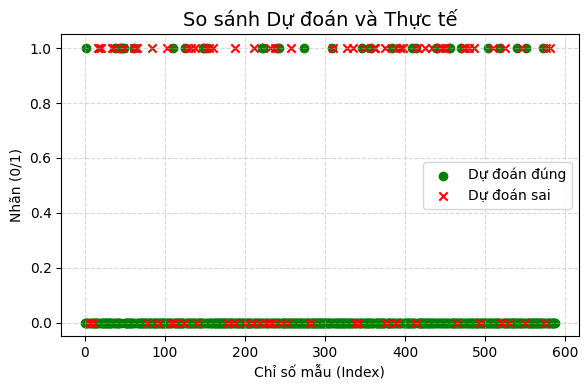

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- TÁCH DỮ LIỆU ---
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_copy_encode, y_copy_encode, test_size=0.4, random_state=42
)

# --- TIỀN XỬ LÝ (Chuẩn hóa & Giảm chiều) ---
# Chuẩn hóa
scaler = StandardScaler().fit(X_train_val)
X_train_val_std = scaler.transform(X_train_val)
X_test_std = scaler.transform(X_test)

# LUỒNG 1: PCA (n=6)
print("\n--- BẮT ĐẦU LUỒNG 1: PCA (n=6) với Gaussian Naive Bayes ---")

# 1a. Áp dụng PCA
pca = PCA(n_components=6).fit(X_train_val_std)
X_train_pca = pca.transform(X_train_val_std)
X_test_pca = pca.transform(X_test_std)
print(f"Đã giảm chiều xuống {X_train_pca.shape[1]} cột bằng PCA.")

# 1b. Huấn luyện Gaussian Naive Bayes trên dữ liệu PCA
print("Đang huấn luyện Gaussian Naive Bayes trên dữ liệu PCA...")
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train_val)

# 1c. Chạy helper_and_plot với Gaussian Naive Bayes
helper_and_plot(
    X_train_pca, X_test_pca, y_train_val, y_test,
    model=gnb_pca,
    command='Gaussian Naive Bayes với dữ liệu PCA (n=6)',
    reduce_name=None  # ĐÃ GIẢM CHIỀU RỒI
)

# LUỒNG 2: LDA (n=1)
print("\n--- BẮT ĐẦU LUỒNG 2: LDA (n=1) với Gaussian Naive Bayes ---")

# 2a. Áp dụng LDA
# n_components=1 vì đây là bài toán 2 lớp
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_val_std, y_train_val)

# Transform cả hai tập
X_train_lda = lda.transform(X_train_val_std)
X_test_lda = lda.transform(X_test_std)
print(f"Đã giảm chiều xuống {X_train_lda.shape[1]} cột bằng LDA.")

# 2b. Huấn luyện Gaussian Naive Bayes trên dữ liệu LDA
print("Đang huấn luyện Gaussian Naive Bayes trên dữ liệu LDA...")
gnb_lda = GaussianNB()
gnb_lda.fit(X_train_lda, y_train_val)

# 2c. Chạy helper_and_plot với Gaussian Naive Bayes
helper_and_plot(
    X_train_lda, X_test_lda, y_train_val, y_test,
    model=gnb_lda,
    command='Gaussian Naive Bayes với dữ liệu LDA (n=1)',
    reduce_name=None  # ĐÃ GIẢM CHIỀU RỒI
)

- Đánh giá mô hình có phù hợp không?

| Mô hình        | Acc test | Confusion Matrix            | Nhận xét |
|----------------|----------|-----------------------------|----------|
| **PCA (6) + GNB** | 85.20%   | [[491 16], [71 10]]         | Bị *mù class thiểu số* nghiêm trọng (chỉ bắt được **10/81** mẫu dương) |
| **LDA (1) + GNB** | 86.39%   | [[475 32], [48 33]]         | Nhận class thiểu số tốt hơn (**33/81**), nhưng vẫn lệch |


Kết luận:
- Cả 2 mô hình chưa thật sự phù hợp khi dữ liệu mất cân bằng.
- LDA + GNB tốt hơn PCA + GNB, nhưng vẫn cần cải thiện thêm vì class 1 (thiểu số) còn bị bỏ sót nhiều.


- Mục tiêu của bài toán: Mục tiêu kinh doanh thực tế không phải là tìm ra người ở lại, mà là tìm ra người sắp nghỉ (Lớp 1) để có biện pháp can thiệp.

- Kết quả thực tế: Mô hình thất bại nặng ở mục tiêu này.

Giải thich nhận định:

- Accuracy cao nhưng không đáng tin:

    - Dữ liệu mất cân bằng ⇒ lớp 0 chiếm đa số.

    - Mô hình chỉ cần đoán toàn bộ là class 0 thì accuracy vẫn cao.

    - Vì vậy accuracy 85–86% là ảo, không phản ánh đúng hiệu quả.

- PCA kém vì không tối ưu phân tách lớp

    - PCA chỉ giữ phương sai lớn, không quan tâm nhãn.

    - Các đặc trưng giúp nhận ra class thiểu số có thể bị loại bỏ.

    - Kết quả: FN = 71, tức bỏ sót 71 đối tượng quan trọng.

- LDA tốt hơn vì có dùng nhãn khi giảm chiều

    - LDA tối ưu khoảng cách giữa các lớp → giúp tách class 1 tốt hơn PCA.

    - FN giảm từ 71 → 48, và bắt được class 1 tăng từ 10 → 33.

    - Tuy nhiên class 1 vẫn chưa đủ tốt do mô hình GNB không xử lý mất cân bằng.

- GNB bản chất không mạnh với mất cân bằng

    - GNB dự đoán theo xác suất (prior class).

    - Khi class 0 quá nhiều → prior của 0 lớn → mô hình có xu hướng đoán 0 nhiều hơn ⇒ bỏ sót class 1.

Kết luận: Mặc dù Accuracy đạt khoảng 86–88% có vẻ cao, nhưng mô hình lại bỏ sót hơn 50% số nhân viên nghỉ việc (class thiểu số). Điều này đồng nghĩa doanh nghiệp không thể nhận diện sớm các trường hợp có nguy cơ nghỉ việc để đưa ra biện pháp giữ chân.
Vì vậy, mô hình Gaussian Naive Bayes trong trường hợp này là chưa phù hợp, do không đáp ứng được mục tiêu cốt lõi của bài toán – dự đoán đúng nhóm nghỉ việc, thay vì chỉ đạt accuracy cao.